### Interactive surfaces to explore how kinetic asymmetry arises

The purpose of this code is to allow you to explore the concept of kinetic asymmetry. To this aim, this code illustrates the energy surfaces of two competing paths in a fuel-driven square reaction network and shows at the same time how the corresponding kinetic surface appears. The code allows you to modify the energy surface and explore how these changes affect the kinetic surface, thus how kinetic asymmetry arises.

__Practically:__ click on the next cell and __press Shift + Enter__ or select __Cell/Run All__ from the above menu. This will compile the code and generate the interactive image displaying the profiles of the square scheme reported along with the surfaces (same as the one discussed in the main text).
By clicking and dragging the colored bars within the image you will be able to change kinetic and thermodynamic parameters and observe in real time how these changes affect the displayed surfaces. Turnover frequency (TOF), kinetic asymmetry ($\Delta$), span ($\delta$) and steady-state molar fractions ($[I_X]$) of all species are also given as output.

Tutorial changes that illustrate kinetic asymmetry principles are reported after the interactive figure block.

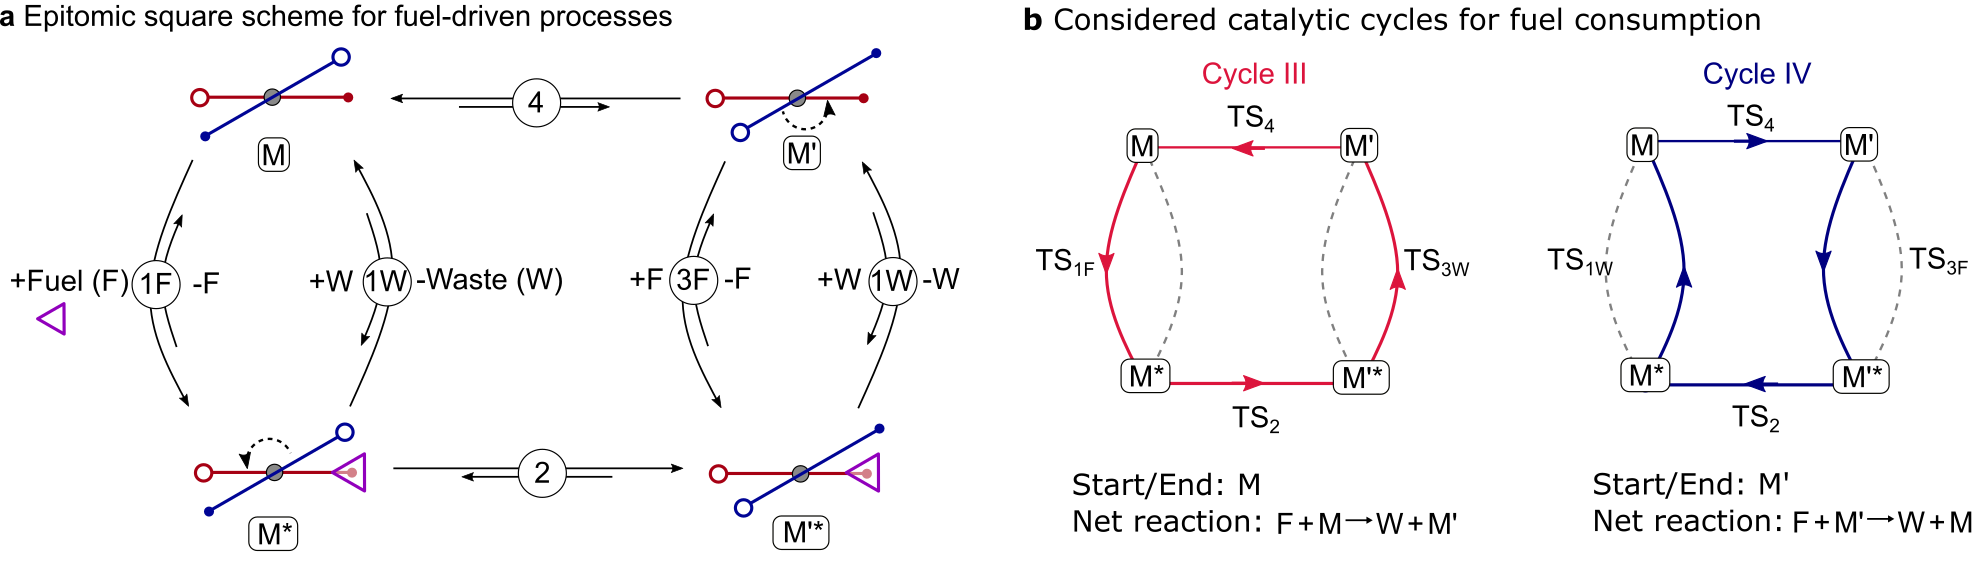

<IPython.core.display.Javascript object>


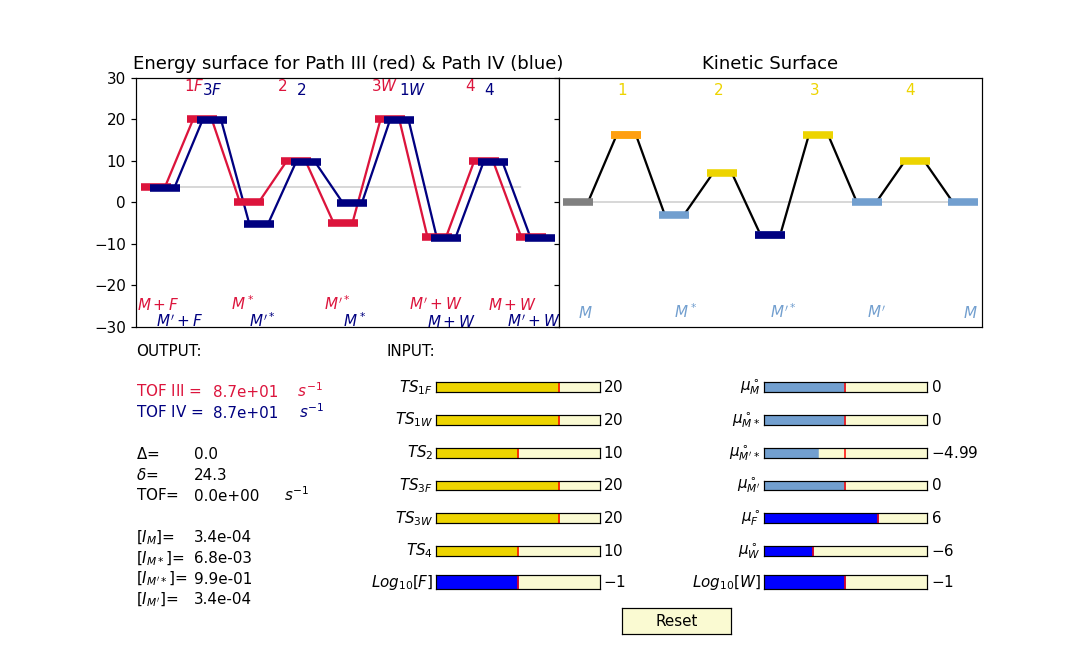

0

In [1]:
### UPLOADING PACKAGES

%matplotlib notebook
from matplotlib.widgets import Slider, Button
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from IPython.core.display import HTML 

### USEFUL CONSTANTS

prefactor = 298*1.380649*1e-23/(6.62607004*1e-34)
RT = 298*1.3806485*6.02214076
C = 298*1.380649*1e-23/(6.62607004*1e-34)


### FUNCTION TO COMPUTE THE TOF AND ITS DERIVATIVES

def kozn(g,I,T):
    '''Function to compute relevant quantities for the energy span model for an emergent cycle of n steps.
    Based on equations in the SI and in J. Am. Chem. Soc.128, 3355-3365 (2006).'''

    G_tmp =  []
    Gp_tmp = []
    
    n = len(I)
    
    #building relevant matrices
    G_mirror = np.tril(np.exp(g)*np.ones((n,n)),-1) + np.triu(np.ones((n,n)),0)
    for i in range(0,n):
        G_i = G_mirror[i][::-1]
        G_tmp.append(G_i)
        
    Gp_mirror = np.triu(np.exp(g)*np.ones((n,n)),1) + np.tril(np.ones((n,n)),0)
    for i in range(0,n):
        G_i = Gp_mirror[i][::-1]
        Gp_tmp.append(G_i)
        
    G = np.asarray(G_tmp)
    Gp= np.asarray(Gp_tmp)
    I = np.exp(-I)
    T = np.exp(T)
    PI = np.array([np.prod(I**-1)*I[n-1-i] for i in range(0,n)])
    PT = np.array([np.prod(T**-1)*T[n-1-i] for i in range(0,n)])
    
    
    TOF = prefactor*(np.exp(g) - 1)/np.dot(np.dot(G,I[::-1]),T)
    
    #computing XTOFs
    XTOFT = []
    XTOFI = []
    
    for t in range(0,n):
        Mt = T[t]*np.prod(T**-1)*np.dot(G[t],PI)
        M  = np.prod(T**-1)*np.dot(np.dot(G,PI),T)
        XTOFT.append(Mt/M)
    
    for i in range(0,n):
        Mi = I[i]*np.prod(I**-1)*np.dot(Gp[i],PT)
        M  = np.prod(I**-1)*np.dot(np.dot(Gp,PT),I)
        XTOFI.append(Mi/M)
        
    return TOF, XTOFT, XTOFI


### DEFINING THE FIGURE

display(Image(filename = "scheme.png"));


fig2, ax = plt.subplots(1,2,figsize=(10,6),sharey=True)
fig2.subplots_adjust(bottom=0.5,wspace=0.0)

ax[0].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
ax[1].tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)

ylim = 30
ax[0].set_ylim([-30, 30])

ax[1].set_title("Kinetic Surface")
ax[0].set_title('Energy surface for Path III (red) & Path IV (blue)')

sy, sx, ssy = -0.2, 0.1, -5


######### STARTING SURFACES

### Kinetic

i0 = 0.0

ii1, ii2, ii3, ii4 = 0,0,0,0
it1f, it1w, it2, it3f, it3w, it4 = 20,20,10,20,20,10
imF, imW, iF, iW = 6, -6, 0.1, 0.1

at1 = i0  - np.log(np.exp(ii4 + imF + np.log(iF) - it1f) + np.exp(ii4 + imW + np.log(iW) - it1w))
ai1 = at1 + np.log(np.exp(ii1 - it1f) + np.exp(ii1 -it1w)) 
at2 = ai1 + it2 - ii1
ai2 = at2 + ii2 - it2
at3 = ai2 - np.log(np.exp(ii2 - it3f) + np.exp(ii2 - it3w))
ai3 = at3 + np.log(np.exp(ii3 + imF + np.log(iF) - it3f) + np.exp(ii3 + imW + np.log(iW) - it3w))
at4 = ai3 + it4 - ii3
ai4 = at4 + ii4 - it4

iI = np.array([ai1,ai2,ai3,ai4])
iT = np.array([at1,at2,at3,at4])

iTOF, iXTOFT, iXTOFI  = kozn(-ai4,iI,iT)

ax[1].plot(0,0,'_',c='#808080',markersize=20,markeredgewidth=5,zorder=10)
intermidiates, = ax[1].plot([1,2,3,4],iI,'_',c='#729fcfff',markersize=20,markeredgewidth=5,zorder=10)
transitionstates, = ax[1].plot([0.5,1.5,2.5,3.5],iT,'_',c='#edd400ff', markersize=20,markeredgewidth=5,zorder=10)
TDT, = ax[1].plot(np.argmax(iXTOFT)+0.5,[iT[np.argmax(iXTOFT)]],'_',c='#ff9f10ff',markersize=20,markeredgewidth=5,zorder=15)
TDI, = ax[1].plot(np.argmax(iXTOFI)+1,[iI[np.argmax(iXTOFI)]],'_',c='#000080ff',markersize=20,markeredgewidth=5,zorder=15)


IM_label = ax[1].text(0,-28,"$M$", c='#729fcfff')
IMs_label = ax[1].text(1,-28,"$M^*$", c='#729fcfff')
IMx_label = ax[1].text(2,-28,"$M'^*$", c='#729fcfff')
IMp_label = ax[1].text(3,-28,"$M'$", c='#729fcfff')
IM_label = ax[1].text(4,-28,"$M$", c='#729fcfff')

TS1_label = ax[1].text(0.5-sx,26,"$1$", c='#edd400ff')
TS2_label = ax[1].text(1.5-sx,26,"$2$", c='#edd400ff')
TS3_label = ax[1].text(2.5-sx,26,"$3$", c='#edd400ff')
TS4_label = ax[1].text(3.5-sx,26,"$4$", c='#edd400ff')


### iii

ciii = '#DC143C'

at1iii = it1f
ai1iii = ii1
at2iii = it2
ai2iii = ii2
at3iii = it3w
ai3iii = ii3 + imW + np.log(iW)
at4iii = it4
ai4iii = ii4 + imW + np.log(iW)

iIiii = np.array([ai1iii,ai2iii,ai3iii,ai4iii])
iTiii = np.array([at1iii,at2iii,at3iii,at4iii])

iTOFiii, iXTOFTiii, iXTOFIiii  = kozn(ii4 + imF + np.log(iF)-ai4iii,iIiii,iTiii)

iIiii = np.insert(iIiii, 0, ii4+imF+np.log(iF), axis=0)

#ax[0].plot(0,0,'_',c=ciii,markersize=20,markeredgewidth=5,zorder=10)
intermidiatesiii, = ax[0].plot([0,1,2,3,4],iIiii,'_',c=ciii,markersize=20,markeredgewidth=5,zorder=10)
transitionstatesiii, = ax[0].plot([0.5,1.5,2.5,3.5],iTiii,'_',c=ciii, markersize=20,markeredgewidth=5,zorder=10)


IMiii_label = ax[0].text(0-2*sx,-26,"$M+F$", color=ciii)
IMsiii_label = ax[0].text(1-2*sx,-26,"$M^*$", color=ciii)
IMxiii_label = ax[0].text(2-2*sx,-26,"$M'^*$", color=ciii)
IMpiii_label = ax[0].text(2.9-2*sx,-26,"$M'+W$", color=ciii)
IMiii_label = ax[0].text(3.75-2*sx,-26,"$M+W$", color=ciii)

TS1Fiii_label = ax[0].text(0.5-2*sx,27+sy,"$1F$", color=ciii)
TS2iii_label = ax[0].text(1.5-2*sx,27+sy,"$2$", color=ciii)
TS3Wiii_label = ax[0].text(2.5-2*sx,27+sy,"$3W$", color=ciii)
TS4iii_label = ax[0].text(3.5-2*sx,27+sy,"$4$", color=ciii)

### iv

civ = '#000080'

at1iv = it3f
ai1iv = ii2
at2iv = it2
ai2iv = ii1
at3iv = it1w
ai3iv = ii4 + imW + np.log(iW)
at4iv = it4
ai4iv = ii3 + imW + np.log(iW)

iIiv = np.array([ai1iv,ai2iv,ai3iv,ai4iv])
iTiv = np.array([at1iv,at2iv,at3iv,at4iv])

iTOFiv, iXTOFTiv, iXTOFIiv  = kozn(ii3 + imF + np.log(iF) -ai4iv,iIiv,iTiv)

iIiv = np.insert(iIiv, 0, ii3 + imF + np.log(iF), axis=0)

#ax[0].plot(0+sx,0+sy,'_',c=civ,markersize=20,markeredgewidth=5,zorder=10)
intermidiatesiv, = ax[0].plot([0+sx,1+sx,2+sx,3+sx,4+sx],iIiv+sy,'_',c=civ,markersize=20,markeredgewidth=5,zorder=10)
transitionstatesiv, = ax[0].plot([0.5+sx,1.5+sx,2.5+sx,3.5+sx],iTiv+sy,'_',c=civ, markersize=20,markeredgewidth=5,zorder=10)

IMpiv_label = ax[0].text(0,-30,"$M'+F$", color=civ)
IMxiv_label = ax[0].text(1,-30,"$M'^*$", color=civ)
IMsiv_label = ax[0].text(2,-30,"$M^*$", color=civ)
IMiv_label = ax[0].text(2.9,-30,"$M+W$", color=civ)
IMpiv_label = ax[0].text(3.75,-30,"$M'+W$", color=civ)

TS3Fiv_label = ax[0].text(0.5,26+sy,"$3F$", color=civ)
TS2iv_label = ax[0].text(1.5,26+sy,"$2$", color=civ)
TS1Wiv_label = ax[0].text(2.5+sx,26+sy,"$1W$", color=civ)
TS4iv_label = ax[0].text(3.5,26+sy,"$4$", color=civ)



########## LINES

l0, = ax[1].plot([0.1, 3.9], [i0, i0],color='#000000ff',zorder=1, linewidth = 0.2)
l1l, = ax[1].plot([0.1, 0.4], [i0, at1],color='#000000ff',zorder=5)
l1r, = ax[1].plot([0.6, 0.9], [at1, ai1],color='#000000ff',zorder=5)
l2l, = ax[1].plot([1.1, 1.4], [ai1, at2],color='#000000ff',zorder=5)
l2r, = ax[1].plot([1.6, 1.9], [at2, ai2],color='#000000ff',zorder=5)
l3l, = ax[1].plot([2.1, 2.4], [ai2, at3],color='#000000ff',zorder=5)
l3r, = ax[1].plot([2.6, 2.9], [at3, ai3],color='#000000ff',zorder=5)
l4l, = ax[1].plot([3.1, 3.4], [ai3, at4],color='#000000ff',zorder=5)
l4r, = ax[1].plot([3.6, 3.9], [at4, ai4],color='#000000ff',zorder=5)


l0liii, = ax[0].plot([0.1, 3.9], [ii4+imF+np.log(iF), ii4+imF+np.log(iF)],color='#000000ff',zorder=1, linewidth = 0.2)
l1liii, = ax[0].plot([0.1, 0.4], [ii4+imF+np.log(iF),  at1iii],   color=ciii,zorder=5)
l1riii, = ax[0].plot([0.6, 0.9], [at1iii, ai1iii],color=ciii,zorder=5)
l2liii, = ax[0].plot([1.1, 1.4], [ai1iii, at2iii],color=ciii,zorder=5)
l2riii, = ax[0].plot([1.6, 1.9], [at2iii, ai2iii],color=ciii,zorder=5)
l3liii, = ax[0].plot([2.1, 2.4], [ai2iii, at3iii],color=ciii,zorder=5)
l3riii, = ax[0].plot([2.6, 2.9], [at3iii, ai3iii],color=ciii,zorder=5)
l4liii, = ax[0].plot([3.1, 3.4], [ai3iii, at4iii],color=ciii,zorder=5)
l4riii, = ax[0].plot([3.6, 3.9], [at4iii, ai4iii],color=ciii,zorder=5)

l1liv, = ax[0].plot([0.1+sx, 0.4+sx], [ii3 + imF +np.log(iF) +sy,    at1iv+sy],color=civ,zorder=5)
l1riv, = ax[0].plot([0.6+sx, 0.9+sx], [at1iv+sy, ai1iv+sy],color=civ,zorder=5)
l2liv, = ax[0].plot([1.1+sx, 1.4+sx], [ai1iv+sy, at2iv+sy],color=civ,zorder=5)
l2riv, = ax[0].plot([1.6+sx, 1.9+sx], [at2iv+sy, ai2iv+sy],color=civ,zorder=5)
l3liv, = ax[0].plot([2.1+sx, 2.4+sx], [ai2iv+sy, at3iv+sy],color=civ,zorder=5)
l3riv, = ax[0].plot([2.6+sx, 2.9+sx], [at3iv+sy, ai3iv+sy],color=civ,zorder=5)
l4liv, = ax[0].plot([3.1+sx, 3.4+sx], [ai3iv+sy, at4iv+sy],color=civ,zorder=5)
l4riv, = ax[0].plot([3.6+sx, 3.9+sx], [at4iv+sy, ai4iv+sy],color=civ,zorder=5)
 

########## OUTPUT DATA

xb = -3.8
yb = + 18

OUTPUT_text = plt.text(-0.8 + xb,-55 +yb,'OUTPUT:')

TOFiii = plt.text(-0.8+xb,-65+yb,"TOF III =                    $s^{-1}$", color=ciii)
TOFiii_val = plt.text(-0+xb,-65+yb,"%.1e" % iTOFiii, color=ciii)

TOFiv = plt.text(-0.8+xb,-70+yb,"TOF IV =                    $s^{-1}$", color=civ)
TOFiv_val = plt.text(-0+xb,-70+yb,"%.1e" % iTOFiv, color=civ)


kr_text = plt.text(-0.8 + xb,-80 +yb,'$\Delta$=')
kr = plt.text(-0.2 + xb,-80 +yb,"%.1f" % ii4)

span_text = plt.text(-0.8 +xb,-85+yb,'$\delta$=')
span_val = plt.text(-0.2 +xb,-85 +yb,"%.1f" % (iT[np.argmax(iXTOFT)]-iI[np.argmax(iXTOFI)]))

tof_text = plt.text(-0.8+xb,-90+yb,'TOF=                      $s^{-1}$')
tof_val = plt.text(-0.2 +xb,-90+yb,"%.1e" % iTOF)


i1_text = plt.text(-0.8 +xb,-100+yb,'[$I_M$]=')
i1_val = plt.text(-0.2  +xb,-100+yb,"%.1e" % iXTOFI[3])

i2_text = plt.text(-0.8 +xb,-105+yb,'[$I_{M*}$]=')
i2_val = plt.text(-0.2  +xb,-105+yb,"%.1e" % iXTOFI[0])

i3_text = plt.text(-0.8 +xb,-110+yb,"[$I_{M'*}$]=")
i3_val = plt.text(-0.2  +xb,-110+yb,"%.1e" % iXTOFI[1])

i4_text = plt.text(-0.8 +xb,-115+yb,"[$I_{M'}$]=")
i4_val = plt.text(-0.2  +xb,-115+yb,"%.1e" % iXTOFI[2])


########## SLIDERS

INPUT_text = plt.text(-2,-37,'INPUT:')

axcolor = 'lightgoldenrodyellow'
axt1f = plt.axes([0.4, 0.40, 0.15, 0.015], facecolor=axcolor)
axt1w = plt.axes([0.4, 0.35, 0.15, 0.015], facecolor=axcolor)
axt2 = plt.axes([ 0.4, 0.30,  0.15, 0.015], facecolor=axcolor)
axt3f = plt.axes([0.4, 0.25, 0.15, 0.015], facecolor=axcolor)
axt3w = plt.axes([0.4, 0.20, 0.15, 0.015], facecolor=axcolor)
axt4 = plt.axes([ 0.4, 0.15,  0.15, 0.015], facecolor=axcolor)
axi4 = plt.axes([ 0.7, 0.40,  0.15, 0.015], facecolor=axcolor)
axi1 = plt.axes([ 0.7, 0.35,  0.15, 0.015], facecolor=axcolor)
axi2 = plt.axes([ 0.7, 0.30,  0.15, 0.015], facecolor=axcolor)
axi3 = plt.axes([ 0.7, 0.25,  0.15, 0.015], facecolor=axcolor)

axmF = plt.axes([0.7, 0.20, 0.15, 0.015], facecolor=axcolor)
axmW = plt.axes([0.7, 0.15, 0.15, 0.015], facecolor=axcolor)
axF = plt.axes([0.4, 0.10, 0.15, 0.02], facecolor=axcolor)
axW = plt.axes([0.7, 0.10, 0.15, 0.02], facecolor=axcolor)

st1f = Slider(axt1f, '$TS_{1F}$', -10, ylim, valinit=it1f,orientation='horizontal',color='#edd400ff')
st1w = Slider(axt1w, '$TS_{1W}$', -10, ylim, valinit=it1w,orientation='horizontal',color='#edd400ff')
st2 = Slider(axt2,   '$TS_2$', -10, ylim, valinit=it2,orientation='horizontal',color='#edd400ff')
st3f = Slider(axt3f, '$TS_{3F}$', -10, ylim, valinit=it3f,orientation='horizontal',color='#edd400ff')
st3w = Slider(axt3w, '$TS_{3W}$', -10, ylim, valinit=it3w,orientation='horizontal',color='#edd400ff')
st4 = Slider(axt4, '$TS_4$', -10, ylim, valinit=it4,orientation='horizontal',color='#edd400ff')
si1 = Slider(axi1, '$\mu^\circ_{M*}$', -15, +15, valinit=ii1,orientation='horizontal',color='#729fcfff')
si2 = Slider(axi2, "$\mu^\circ_{M'*}$", -15, +15, valinit=ii2,orientation='horizontal',color='#729fcfff')
si3 = Slider(axi3, "$\mu^\circ_{M'}$", -15, +15, valinit=ii3,orientation='horizontal',color='#729fcfff')
si4 = Slider(axi4, '$\mu^\circ_{M}$', -15, +15, valinit=ii4,orientation='horizontal',color='#729fcfff')

smF = Slider(axmF, '$\mu^\circ_F$', -15, 15, valinit=imF,orientation='horizontal',color='b')
smW = Slider(axmW, '$\mu^\circ_W$', -15, 15, valinit=imW,orientation='horizontal',color='b')
sF = Slider(axF, '$Log_{10} [F]$', -4, 2, valinit=np.log10(iF),orientation='horizontal',color='b')
sW = Slider(axW, '$Log_{10} [W]$', -4, 2, valinit=np.log10(iW),orientation='horizontal',color='b')

##### MODIFY SLIDERS

def update(val):
    F  = 10**sF.val
    W  = 10**sW.val
###KINETIC SURFACE
    t1 = 0  - np.log(np.exp(si4.val + smF.val + np.log(F) - st1f.val) + np.exp(si4.val + smW.val + np.log(W) - st1w.val))
    i1 = t1 + np.log(np.exp(si1.val - st1f.val) + np.exp(si1.val -st1w.val)) 
    t2 = i1 + st2.val - si1.val
    i2 = t2 + si2.val - st2.val
    t3 = i2 - np.log(np.exp(si2.val - st3f.val) + np.exp(si2.val - st3w.val))
    i3 = t3 + np.log(np.exp(si3.val + smF.val + np.log(F) - st3f.val) + np.exp(si3.val + smW.val + np.log(W) - st3w.val))
    t4 = i3 + st4.val - si3.val
    i4 = t4 + si4.val - st4.val
    I = np.array([i1,i2,i3,i4])
    T = np.array([t1,t2,t3,t4])
    intermidiates.set_ydata(I)
    transitionstates.set_ydata(T)
    TOF, XTOFT, XTOFI  = kozn(-I[3],I,T)
    kr.set_text("%.1f" % I[3])
    span_val.set_text("%.1f" % (T[np.argmax(XTOFT)]-I[np.argmax(XTOFI)]))
    tof_val.set_text("%.1e" % TOF)
    i1_val.set_text("%.1e" % XTOFI[3])
    i2_val.set_text("%.1e" % XTOFI[0])
    i3_val.set_text("%.1e" % XTOFI[1])
    i4_val.set_text("%.1e" % XTOFI[2])
    TDT.set_ydata([T[np.argmax(XTOFT)]])
    TDT.set_xdata(np.argmax(XTOFT)+0.5)
    TDI.set_ydata([I[np.argmax(XTOFI)]])
    TDI.set_xdata(np.argmax(XTOFI)+1)
    l1l.set_ydata([0,T[0]])
    l1r.set_ydata([T[0],I[0]])
    l2l.set_ydata([I[0],T[1]])
    l2r.set_ydata([T[1],I[1]])
    l3l.set_ydata([I[1],T[2]])
    l3r.set_ydata([T[2],I[2]])
    l4l.set_ydata([I[2],T[3]])
    l4r.set_ydata([T[3],I[3]])
###PATH III
    t1iii = st1f.val
    i1iii = si1.val 
    t2iii = st2.val
    i2iii = si2.val
    t3iii = st3w.val
    i3iii = si3.val + smW.val + np.log(W)
    t4iii = st4.val
    i4iii = si4.val + smW.val + np.log(W)
    Iiii = np.array([i1iii,i2iii,i3iii,i4iii])
    Tiii = np.array([t1iii,t2iii,t3iii,t4iii])
    TOFiii, XTOFTiii, XTOFIiii  = kozn(si4.val+smF.val+np.log(F)-Iiii[3],Iiii,Tiii)
    Iiii = np.insert(Iiii, 0, si4.val+smF.val+np.log(F), axis=0)
    intermidiatesiii.set_ydata(Iiii)
    transitionstatesiii.set_ydata(Tiii)
    l0liii.set_ydata([Iiii[0],Iiii[0]])
    l1liii.set_ydata([Iiii[0],Tiii[0]])
    l1riii.set_ydata([Tiii[0],Iiii[1]])
    l2liii.set_ydata([Iiii[1],Tiii[1]])
    l2riii.set_ydata([Tiii[1],Iiii[2]])
    l3liii.set_ydata([Iiii[2],Tiii[2]])
    l3riii.set_ydata([Tiii[2],Iiii[3]])
    l4liii.set_ydata([Iiii[3],Tiii[3]])
    l4riii.set_ydata([Tiii[3],Iiii[4]])
    TOFiii_val.set_text("%.1e" % TOFiii)
###PATH IV
    t1iv = st3f.val
    i1iv = si2.val 
    t2iv = st2.val
    i2iv = si1.val
    t3iv = st1w.val
    i3iv = si4.val + smW.val + np.log(W)
    t4iv = st4.val
    i4iv = si3.val + smW.val + np.log(W)
    Iiv = np.array([i1iv,i2iv,i3iv,i4iv])
    Tiv = np.array([t1iv,t2iv,t3iv,t4iv])
    TOFiv, XTOFTiv, XTOFIiv  = kozn(si3.val+smF.val+np.log(F)-Iiv[3],Iiv,Tiv)
    Iiv = np.insert(Iiv, 0, si3.val + smF.val +np.log(F), axis=0)
    intermidiatesiv.set_ydata(Iiv+sy)
    transitionstatesiv.set_ydata(Tiv+sy)
    l1liv.set_ydata([Iiv[0]+sy,Tiv[0]+sy])
    l1riv.set_ydata([Tiv[0]+sy,Iiv[1]+sy])
    l2liv.set_ydata([Iiv[1]+sy,Tiv[1]+sy])
    l2riv.set_ydata([Tiv[1]+sy,Iiv[2]+sy])
    l3liv.set_ydata([Iiv[2]+sy,Tiv[2]+sy])
    l3riv.set_ydata([Tiv[2]+sy,Iiv[3]+sy])
    l4liv.set_ydata([Iiv[3]+sy,Tiv[3]+sy])
    l4riv.set_ydata([Tiv[3]+sy,Iiv[4]+sy])
    TOFiv_val.set_text("%.1e" % TOFiv)
### Canvas    
    fig2.canvas.draw_idle()

st1f.on_changed(update)
st1w.on_changed(update)
st2.on_changed(update)
st3f.on_changed(update)
st3w.on_changed(update)
st4.on_changed(update)
si1.on_changed(update)
si2.on_changed(update)
si3.on_changed(update)
si4.on_changed(update)
smF.on_changed(update)
sF.on_changed(update)
smW.on_changed(update)
sW.on_changed(update)

### Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = plt.axes([0.57, 0.03, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')

def reset(event):
    st1f.reset()
    st1w.reset()
    si1.reset()
    st2.reset()
    si2.reset()
    st3f.reset()
    st3w.reset()
    si3.reset()
    st4.reset()
    si4.reset()
    smF.reset()
    sF.reset()
    smW.reset()
    sW.reset()
button.on_clicked(reset)



## Tutorial changes: explore how kinetic asymmetry arises

In this block of text we propose some tutorial variations that illustrate how kinetic asymmetry can emerge in the square scheme. The interactive image shows the energy profiles of the two competing pathways III and IV (left) and the corresponding kinetic surface (right). The notation employed refers to the square scheme reported in the static image above, identical to the one employed in the main text.

By clicking and dragging the yellow and blue bars on the bottom part of the image you can change all the indicated parameters and experience what regulates kinetic asymmetry.

__Initial condition.__ By clicking on "Reset" the initial situation is depicted. This situation depicts a case in which Fuel to Waste converison is thermodynamically favored, indeed after one catalytic cyle the energy of the system is lower, reflecting the lower chemical potential of W ($\mu_{W} = \mu_{W}^\circ + \ln[W]$ in units of $RT$) with respect to F ($\mu_{F} = \mu_{F}^\circ + \ln[F]$ in units of $RT$). While at the steady state there is a continuous Fuel to Waste conversion, no kinetic asymmetry is present because the energy profiles of path III and IV are identical. This illustrates that Fuel to Waste conversion is not a sufficient condition to have kinetic asymmetry, while necessary.

__Tutorial 1.__ By lowering the TS energy of reaction 3W (slider $TS_{3W}$), i.e. favoring waste release from the state M'\*, kinetic asymmetry emerges: in the kinetic surface the final state is lower with respect to the initial one. The most populated state at the steady-state changes from M\* to M', with TS1 as rate-determining TS.

__Tutorial 2.__ Starting form the previous condition (tutorial 1, lower energy for $TS_{3W}$) by changing the chemical potential of any of the intermediates (light blue bars) you will see that kinetic asymmetry ($\Delta$) remains unaffected. This shows that states' stability are not relevant for kinetic asymmetry to emerge, conferming that it is a purely kinetic phenomenon. On the other hand, the span ($\delta$) and thus TOF are affected by states' stability.

__Tutorial 3.__ Form the previous condition (tutorial 2, lower energy for $TS_{3W}$, any state stability) increase the standard chemical potential of the waste W ($\mu_{W}^°$),  so that it becomes equal to the standard chemical potential of the Fuel ($\mu_{F}^°$). When their chemical potential is the same (thus $K_{eq}$ = 1), with equal concentrations of F and W --- as in the present case --- the systems is at equilibrium. This illustrates that Fuel to Waste conversion is a necessary requirement to have kinetic asymmetry (to _exactly_ match the numerical value of $\mu_{W}^°$ and $\mu_{F}^°$, it may be necessary to slighly modify also the numerical value of the latter).

__Tutorial 4.__ From the previous condition (tutorial 3, same chemical potential for F and W), changing the concentration of F and W (decimal logarithm of their molar concentration) restores kinetic asymmetry.

__Tutorial 5.__ [Restart from the initial condition by pressing "Reset", or by compiling the cell with Shift+Enter.] Destabilize M' and stabilize M'\* by increasing $\mu_{M'}^°$ and decreasing $\mu_{M'*}^°$. As previously shown, no kinetic asymmetry arises ($\Delta = 0$), because state stability does not affect it. What is interesting to note here is that all the rate constants of the system (the heights of each step) are different from one another. This illustrates that "symmetry" is a property of transition states (absolute energies) and not the rate constants.

__Tutorial 6.__ From the previous condition (tutorial 5), decrease $TS_{3W}$. Kinetic asymmetry will arise. Two changes can restore kinetic symmetry ($\Delta = 0$):
(1) intuitively, decreasing $TS_{1W}$ to match $TS_{3W}$, which means that Waste release occurs via the same TS (same energy) in the two forms of catalyst M; 
(2) less intuitively, decreasing $TS_{3F}$ to match $TS_{3W}$, which chemically means that M' is a better catalyst with respect to M, both in terms of F binding and W release. This implies that having a bistable catalyst in which one form is better suited to promote F to W conversion is not sufficient to realize a kinetically asymmetric system.

Note that in both cases (1) and (2) it may happen to obtain a fully kinetic symmetric system ($\Delta = 0$ and TOF = 0 or ~0 due to numerical imprecision) despite TOF III $\neq$ TOF IV. The reason is that calculating the TOF for Path III and Path IV separately ignores the dynamic coupling between them arising when the whole network is considered, as anticipated in _Acc. Chem. Res._ 44, 101–110 (2011) for catalytic cycles. This nicely illustrates the importance of building a kinetic surface encoding all dynamic properties of the system intstead of just looking to single pathways in the network.

__Tutorial 7.__ [Restart from the initial condition by pressing "Reset", or by compiling the cell with Shift+Enter.] Decrease $TS_{3W}$ to let kinetic asymmetry emerge. Now, increase $TS_{2}$. Changing the TS associates with the switching process does not inflence kinetic asymmetry ($\Delta$). When $TS_{2}$ becomes TOF-determing (orange) its influence becomes significant on the TOF due to changes induced in the kinetic span ($\delta$). Instead, when $TS_{2}$ is not TOF-determing its influence is negligible. Similarly, also the influence of, e.g., $TS_{1F}$ changes significantly its influence on ($\Delta$) and ($\delta$), depending on its contribution in determining TOFs.     

__Tutorial 8.__ [Restart from the initial condition by pressing "Reset", or by compiling the cell with Shift+Enter.] The target of this tutorial change is to demonstrate the accumulation of a thermodynamically unstable species. To this aim, M' is destabilized, by increasing ($\mu_{M'}^°$). The target is to make it the most populated state under non-equilibrium conditions (dark blue state in the kinetic surface). This can be achieved in two steps: (1) $TS_{3W}$ is decreased, making M' more dynamically kinetic stable with respect to M'\* (and kinetic asymmetry emerges). Chemically, this means that F to W conversion is favored in the switched state, M'; (2) $TS_{4}$ is increased, to become the TOF-determining transition state, which makes thermodynamically unstable M' the most populated state at the steady-state, because now the thermodynamically favored relaxation to M is slow on the cycling time scale (now controlled by $TS_{4}$). Significantly, these two conditions are met also in microtubules, where GTP hydrolysis occurs preferentially in the assembled (switched) state, to afford a kinetically-trapped GDP-rich microtubule.

__General remarks.__ In the present form, kinetic surfaces can be used to describe homogeneous non-equilibrium systems at the stationary state. Kinetic surfaces do not apply to other cases, such as batch excursion experiments. Moreover, it is stressed that constructing the kinetic surface requires mathematical steps that reflect thermodynamically forbidden operations, therefore, all thermodynamic information is --- at first --- lost. The validity of any useful information retrieved from the kinetic surface should be demonstrated, as it was done for the quantities discussed in this work.

G.R. would like to thank Thomas Hermans for illustrating the utility of an interactive code to visualize the principles of kinetic asymmetry, which inspired the preparation of this tutorial.